In [1]:
%pip install ..

Processing /home/sjoshi/spuco
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spuco: filename=spuco-0.0.1-py3-none-any.whl size=90021 sha256=b5ea2a1634e28ba15377214f2dc42512b2d47ad7f3a17bb2846c6f6101970f95
  Stored in directory: /tmp/pip-ephem-wheel-cache-hnl6n2ef/wheels/ef/5d/43/a265894b1d52121a51705a208277e8d9a9670e95fa1a2e7ae6
Successfully built spuco
  Attempting uninstall: spuco
    Found existing installation: spuco 0.0.1
    Uninstalling spuco-0.0.1:
      Successfully uninstalled spuco-0.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spuco.datasets as dsets
from spuco.datasets.base_spuco_dataset import SpuriousFeatureDifficulty

In [3]:
import torchvision.transforms as T 

dataset = dsets.spuco_mnist.SpuCoMNIST(
    root="/data/mnist/",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_EASY,
    spurious_correlation_strength=[0.2, 0.9],
    classes=[[0],[1]],
    label_noise=0.4,
    core_feature_noise=1.0,
    transform=T.ToPILImage()
)
dataset.initialize()

In [4]:
len(dataset)

10133

In [18]:
dataset.group_weights

{(0, 1): 0.45001480311852365,
 (1, 1): 0.45001480311852365,
 (0, 0): 0.05072535280765815,
 (1, 0): 0.04924504095529458}

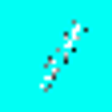

In [17]:
dataset[5][0].resize((28*4, 28*4))

In [6]:
label_noise_idx = []
for i, (label, clean_label) in enumerate(zip(dataset.data.labels, dataset.data.clean_labels)):
    if label != clean_label: 
        label_noise_idx.append(i)
        

In [7]:
len(label_noise_idx)

4053

In [8]:
core_feature_noise_idx = []
for i in range(len(dataset)):
    if dataset.data.core_feature_noise[i]:
        core_feature_noise_idx.append(i)

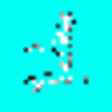

In [9]:
display(dataset[core_feature_noise_idx[6]][0].resize((28*4, 28*4)))

In [10]:
t = T.ToTensor()(dataset[core_feature_noise_idx[6]][0])

In [11]:
import torch 
(torch.randn_like(t[0, :, :]) > 0.5).unsqueeze(dim=0).repeat(3, 1, 1).shape

torch.Size([3, 28, 28])